# Kernel PCAs 
In this notebook we will be following a tutorial from Scikit Learn. You can find the tutorial <a href="https://scikit-learn.org/stable/auto_examples/applications/plot_digits_denoising.html#sphx-glr-auto-examples-applications-plot-digits-denoising-py">here</a>. We'll be using a Kernel PCA to de-noise handwritten digits. 
We will add noise to the dataset from scikit learn to demonstrate the differences between PCA and Kernel PCA. 

### Setting Up the DataFrames

In [1]:
# Import the necessary libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA

In [2]:
# Get data and 
X, y = fetch_openml(data_id=41082, return_X_y=True)
# print(X.head(5))
X = MinMaxScaler().fit_transform(X)
# X = np.array(X)
# print(X)

In [3]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [4]:
# Split into Testing and Training Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, train_size=1000, test_size=100)

# Creating noise test and training sets
rng = np.random.RandomState(0)

noise = rng.normal(scale=0.25, size=X_test.shape)
X_test_noisey = X_test + noise

noise = rng.normal(scale=0.25, size=X_train.shape)
X_train_noisey = X_train + noise

### Creating a Photo Visualization Function

In [5]:
import matplotlib.pyplot as plt

def plot_digits(X, title):
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)

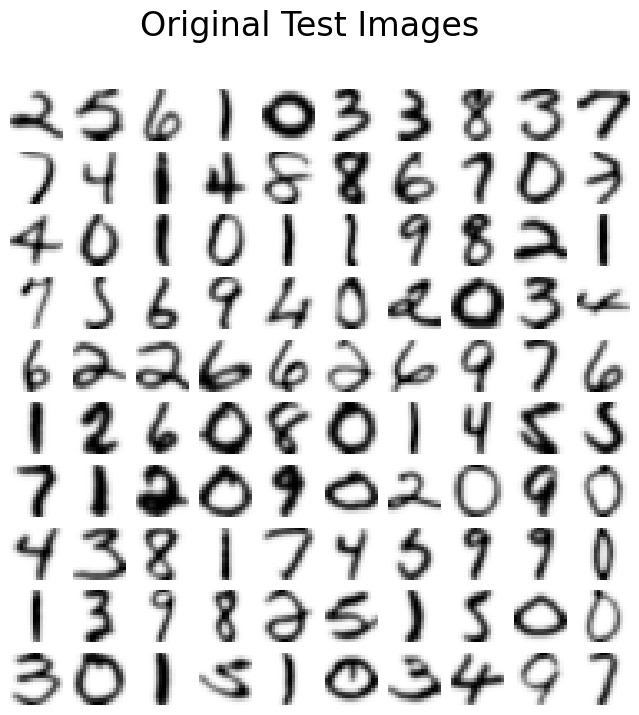

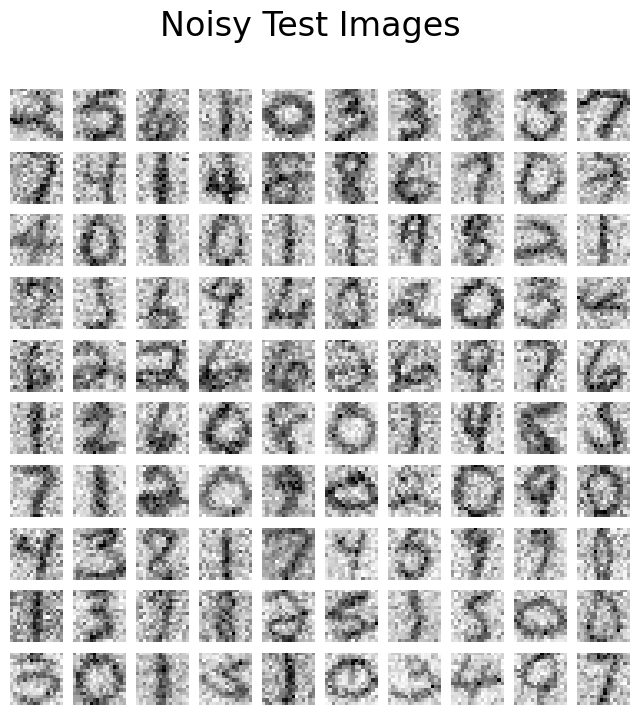

In [6]:
plot_digits(X_test, "Original Test Images")
plot_digits(X_test_noisey, "Noisy Test Images")

## Principal Component Analysis

In [7]:
# Initialize pca and kernel pca

# n_components are the numbers of components we are going to keep 
pca = PCA(n_components=32, random_state=42)

#using a rbf kernel
kernel_pca = KernelPCA(n_components=400, kernel="rbf", gamma=1e-3, fit_inverse_transform=True, alpha=5e-3, random_state=42)

pca.fit(X_train_noisey)
kernel_pca.fit(X_train_noisey)


KernelPCA(alpha=0.005, fit_inverse_transform=True, gamma=0.001, kernel='rbf',
          n_components=400, random_state=42)

In [8]:
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test_noisey))
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test_noisey))

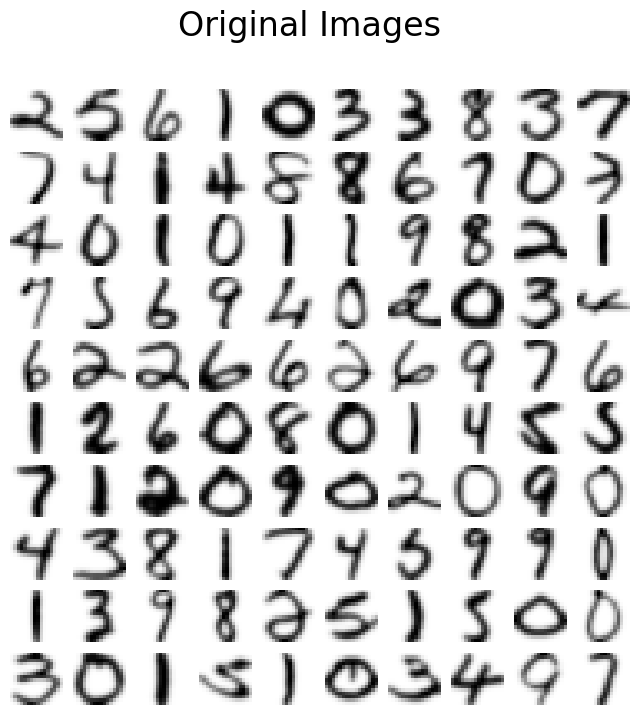

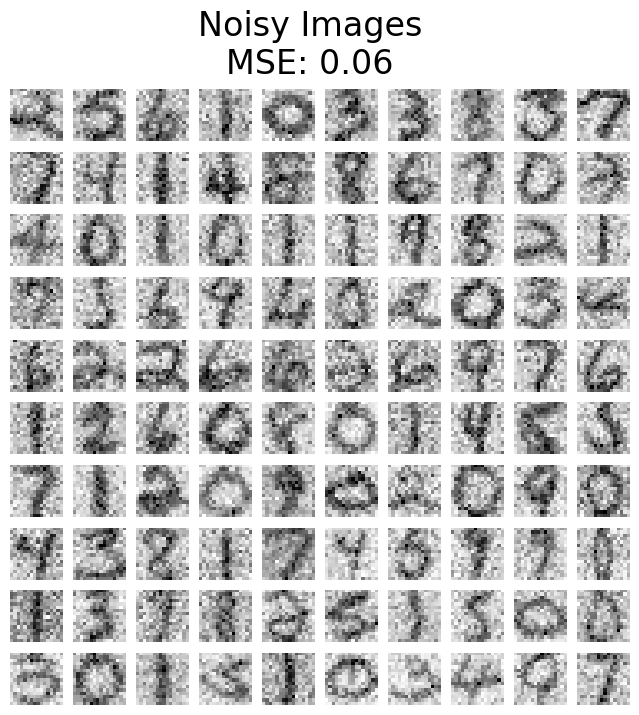

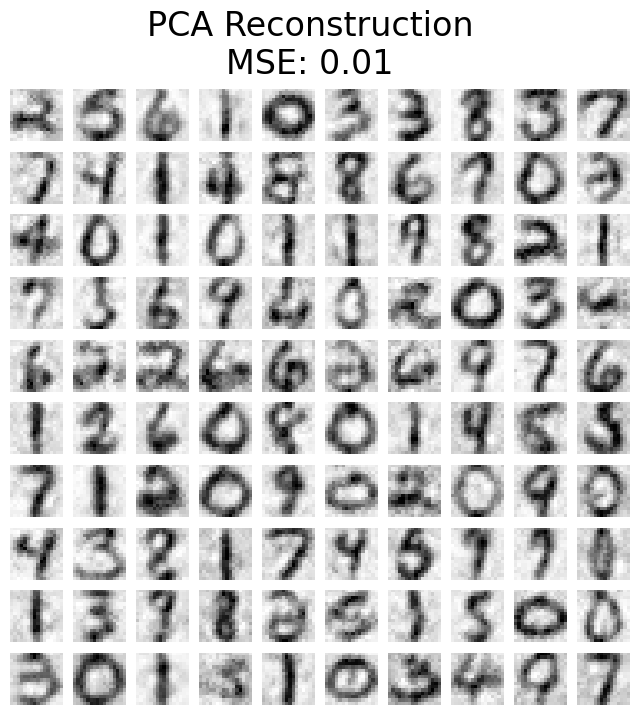

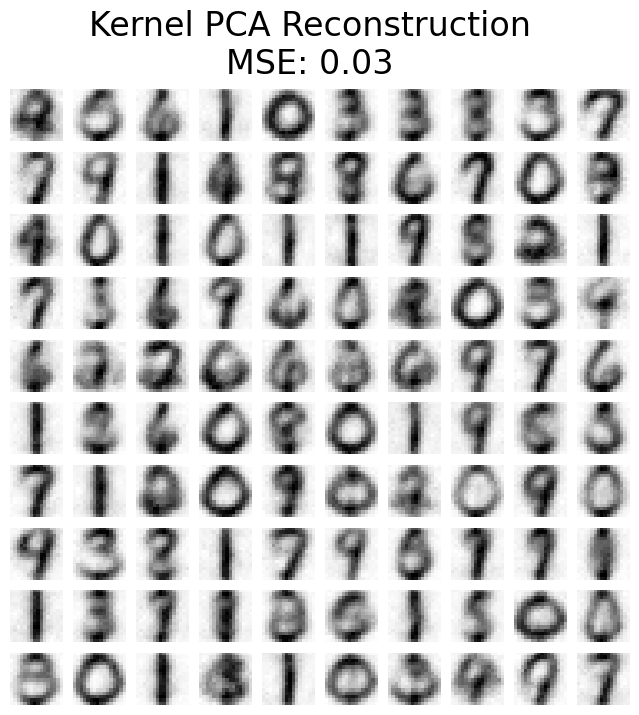

In [9]:
plot_digits(X_test, "Original Images")
plot_digits(X_test_noisey, f"Noisy Images\nMSE: {np.mean((X_test- X_test_noisey) ** 2):.2f}")


plot_digits(X_reconstructed_pca, f"PCA Reconstruction\nMSE: {np.mean((X_test - X_reconstructed_pca) ** 2):.2f}")
plot_digits(X_reconstructed_kernel_pca, f"Kernel PCA Reconstruction\nMSE: {np.mean((X_test - X_reconstructed_kernel_pca) ** 2):.2f}")